In [112]:
# --- Importing necessary libraries ---
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [113]:
# --- Reading and combining multiple CSV files ---

# Read a single file (commented out here)
# df = pd.read_csv(r"C:\Users\marwa\2025\Hotel project\Hotel\2018.csv")

# List all files in the folder (Hotel project\Hotel)
files = [file for file in os.listdir(r"C:\Users\marwa\2025\Hotel project\Hotel")]

# Create an empty DataFrame to store all data
all_years_data = pd.DataFrame()

# Loop through each file and read the data
for file in files:
    df = pd.read_csv(r"C:\Users\marwa\2025\Hotel project\Hotel\\" + file)  # Read CSV file
    all_years_data = pd.concat([all_years_data, df])  # Append data to main DataFrame

# Save the combined data into one CSV file
all_years_data.to_csv("all_years_data.csv", index=False)

In [114]:
all_years_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2018
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2018
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2018
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/2018
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2/1/2020
40683,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,7/16/2020
40684,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,5/6/2020
40685,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,7/17/2020


In [115]:
all_years_data.shape

(141947, 32)

In [116]:
# --- Load market segment data ---
market_segment=pd.read_csv(r"C:\Users\marwa\2025\Hotel project\market_segment.csv")

In [117]:
market_segment

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation
5,0.30,Offline TA/TO
6,0.30,Online TA
7,1.00,Complementary


In [118]:
# --- Merge market segment info into main dataset ---
all_years_data=all_years_data.merge(market_segment,how="left",on="market_segment")

In [119]:
# --- Load meal cost data ---
meal_cost=pd.read_csv(r"C:\Users\marwa\2025\Hotel project\meal_cost.csv")

In [120]:
meal_cost

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [121]:
# --- Merge meal cost data into the main dataset ---
all_years_data=all_years_data.merge(meal_cost,how="left",on="meal")

In [253]:
all_years_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost,arrival_date,booking_source,total_stays,total_guests,is_family,total_meal_revenue,discount_value,net_revenue_after_discount,total_booking_revenue
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2018-05-06,0.30,12.99,2018-07-01,Agent only,3,2,0,25.98,73.80,172.20,198.18
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2018-04-22,0.30,17.99,2018-07-01,Agent only,3,2,0,35.98,94.95,221.55,257.53
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2018-06-23,0.30,12.99,2018-07-01,Agent only,4,2,0,25.98,147.60,344.40,370.38
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2018-05-11,0.30,12.99,2018-07-01,Agent only,7,2,0,25.98,224.70,524.30,550.28
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2018-05-29,0.10,12.99,2018-07-01,Direct,10,2,0,25.98,108.30,974.70,1000.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141942,City Hotel,1,1,2020,February,5,1,0,0,1,0,0,BB,AUT,Aviation,Corporate,1,0,1,A,A,0,No Deposit,0,Transient,0.0,0,1,No-Show,2020-02-01,0.20,12.99,2020-02-01,Company only,0,1,0,12.99,0.00,0.00,12.99
141943,City Hotel,1,31,2020,July,29,16,2,0,1,0,0,BB,USA,Direct,Direct,1,0,2,A,A,1,No Deposit,0,Transient,135.0,0,2,No-Show,2020-07-16,0.10,12.99,2020-07-16,Direct,2,1,0,12.99,27.00,243.00,255.99
141944,City Hotel,1,25,2020,May,18,6,2,1,1,0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,0,Transient,125.0,0,0,No-Show,2020-05-06,0.15,12.99,2020-05-06,Company only,3,1,0,12.99,56.25,318.75,331.74
141945,City Hotel,1,6,2020,July,29,17,1,0,1,0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,0,Transient,65.0,0,0,No-Show,2020-07-17,0.15,12.99,2020-07-17,Company only,1,1,0,12.99,9.75,55.25,68.24


In [123]:
all_years_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141947 non-null  object 
 1   is_canceled                     141947 non-null  int64  
 2   lead_time                       141947 non-null  int64  
 3   arrival_date_year               141947 non-null  int64  
 4   arrival_date_month              141947 non-null  object 
 5   arrival_date_week_number        141947 non-null  int64  
 6   arrival_date_day_of_month       141947 non-null  int64  
 7   stays_in_weekend_nights         141947 non-null  int64  
 8   stays_in_week_nights            141947 non-null  int64  
 9   adults                          141947 non-null  int64  
 10  children                        141939 non-null  float64
 11  babies                          141947 non-null  int64  
 12  meal            

In [124]:
# Convert reservation_status_date to datetime format
all_years_data['reservation_status_date']=pd.to_datetime(all_years_data['reservation_status_date'])

In [125]:
# Create a proper arrival_date column from year + month + day columns
all_years_data['arrival_date']=pd.to_datetime(all_years_data['arrival_date_year'].astype(str) + "-" +
                                              all_years_data['arrival_date_month'].astype(str) + "-" +
                                              all_years_data["arrival_date_day_of_month"].astype(str),
                                              errors='coerce')

In [126]:
# Convert children column to nullable integer 
all_years_data["children"] = all_years_data["children"].astype("Int64")

In [127]:
# Convert important categorical flags to integer type
all_years_data["is_canceled"] = all_years_data["is_canceled"].astype("Int64")
all_years_data["is_repeated_guest"] = all_years_data["is_repeated_guest"].astype("Int64")

In [128]:
# Show final info after type conversions
all_years_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  Int64         
 2   lead_time                       141947 non-null  int64         
 3   arrival_date_year               141947 non-null  int64         
 4   arrival_date_month              141947 non-null  object        
 5   arrival_date_week_number        141947 non-null  int64         
 6   arrival_date_day_of_month       141947 non-null  int64         
 7   stays_in_weekend_nights         141947 non-null  int64         
 8   stays_in_week_nights            141947 non-null  int64         
 9   adults                          141947 non-null  int64         
 10  children                        141939 non-null  Int64  

In [129]:
# Handle missing values:
all_years_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               8
babies                                 0
meal                                   0
country                              625
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              19555
company         

In [130]:
all_years_data["country"]=all_years_data["country"].fillna("Unknown")

In [131]:
#  Drop rows with missing 'children' (very few records)
all_years_data = all_years_data.dropna(subset=['children'])

In [132]:
#  Create 'booking_source' from 'agent' and 'company', then drop both columns
def classify_booking(row):
    if pd.isna(row['agent']) and pd.isna(row['company']):
        return 'Direct'
    elif not pd.isna(row['agent']) and pd.isna(row['company']):
        return 'Agent only'
    elif pd.isna(row['agent']) and not pd.isna(row['company']):
        return 'Company only'
    else:
        if row['agent'] == row['company']:
            return 'Agent only'
        else:
            return 'Agent+Company'

all_years_data['booking_source'] = all_years_data.apply(classify_booking, axis=1)
all_years_data.drop(["agent", "company"], axis=1, inplace=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\1164533598.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['booking_source'] = all_years_data.apply(classify_booking, axis=1)
C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\1164533598.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data.drop(["agent", "company"], axis=1, inplace=True)


In [133]:
# Check unique values for categorical columns to understand data distribution
all_years_data['hotel'].value_counts()

hotel
City Hotel      93095
Resort Hotel    48844
Name: count, dtype: int64

In [134]:
all_years_data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [135]:
all_years_data['meal'].unique()

array(['BB', 'HB', 'FB', 'Undefined', 'SC'], dtype=object)

In [136]:
all_years_data['distribution_channel'].unique()

array(['TA/TO', 'Direct', 'Corporate', 'Undefined', 'GDS'], dtype=object)

In [137]:
# Fix country code issue: replace 'TMP' with 'TLS'
all_years_data['country'].unique()
all_years_data['country'] = all_years_data['country'].replace("TMP", "TLS")
all_years_data['country'].unique()

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\1650186442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['country'] = all_years_data['country'].replace("TMP", "TLS")


array(['PRT', 'IRL', 'ESP', 'DEU', 'CN', 'ITA', 'Unknown', 'GBR', 'BEL',
       'RUS', 'FRA', 'MOZ', 'IRN', 'BRA', 'KOR', 'AGO', 'USA', 'ROU',
       'NOR', 'OMN', 'ARG', 'POL', 'CHE', 'GRC', 'NLD', 'DNK', 'SWE',
       'AUS', 'EST', 'CZE', 'FIN', 'BWA', 'LUX', 'SVN', 'ALB', 'IND',
       'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL',
       'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'ISR', 'CYM', 'ZMB', 'CPV',
       'ZWE', 'DZA', 'CRI', 'NZL', 'HUN', 'IDN', 'HRV', 'KAZ', 'THA',
       'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN', 'GIB', 'ARM', 'JPN',
       'LKA', 'TUN', 'STP', 'BGR', 'TWN', 'AZE', 'LBN', 'SVK', 'CMR',
       'SGP', 'SEN', 'PER', 'EGY', 'SAU', 'KNA', 'JOR', 'KWT', 'ETH',
       'PHL', 'LIE', 'MMR', 'IRQ', 'PAN', 'GEO', 'TLS', 'MUS', 'ECU',
       'ARE', 'HKG', 'AND', 'URY', 'JEY', 'CYP', 'GGY', 'HND', 'PAK',
       'QAT', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'MDV', 'NIC', 'ISL',
       'BEN', 'MAC', 'VGB', 'MLT', 'TZA', 'GAB', 'BIH', 'VNM', 'GHA',
       'GLP', 'KE

In [138]:
all_years_data['market_segment'].unique()

array(['Online TA', 'Offline TA/TO', 'Direct', 'Corporate', 'Groups',
       'Complementary', 'Aviation'], dtype=object)

In [139]:
all_years_data['reserved_room_type'].unique() 

array(['A', 'D', 'E', 'G', 'F', 'H', 'C', 'L', 'B', 'P'], dtype=object)

In [140]:
all_years_data['assigned_room_type'].unique()

array(['A', 'D', 'E', 'G', 'F', 'H', 'C', 'B', 'L', 'I', 'K', 'P'],
      dtype=object)

In [141]:
all_years_data['deposit_type'].unique()  

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [142]:
all_years_data['customer_type'].unique()  

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [143]:
all_years_data['reservation_status'].unique()  

array(['Canceled', 'Check-Out', 'No-Show'], dtype=object)

In [144]:
# Create new feature: total stays (weekend + week nights)
all_years_data['total_stays']=all_years_data['stays_in_weekend_nights']+all_years_data['stays_in_week_nights']

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\1912068819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['total_stays']=all_years_data['stays_in_weekend_nights']+all_years_data['stays_in_week_nights']


In [145]:
# Create new feature: total guests (adults + children + babies)
all_years_data['total_guests']=all_years_data['adults']+all_years_data['children']+all_years_data['babies']

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\968436821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['total_guests']=all_years_data['adults']+all_years_data['children']+all_years_data['babies']


In [146]:
# Flag family bookings (1 if children or babies > 0, else 0)
all_years_data['is_family'] = ((all_years_data['children'] + all_years_data['babies']) > 0).astype("int64")

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\2994395126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['is_family'] = ((all_years_data['children'] + all_years_data['babies']) > 0).astype("int64")


In [147]:
# Calculate total meal revenue (meal cost × total guests)
all_years_data['total_meal_revenue']=all_years_data['Cost']*(all_years_data['children']+all_years_data['babies']+all_years_data['adults'])

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\3518231618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['total_meal_revenue']=all_years_data['Cost']*(all_years_data['children']+all_years_data['babies']+all_years_data['adults'])


In [148]:
# Calculate discount value (ADR × total stays × discount rate)
all_years_data['discount_value']=all_years_data['adr']*all_years_data['total_stays']*all_years_data['Discount']

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\2540436119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['discount_value']=all_years_data['adr']*all_years_data['total_stays']*all_years_data['Discount']


In [149]:
# Calculate net revenue after discount (room revenue - discount)
all_years_data['net_revenue_after_discount']=(all_years_data['adr']*all_years_data['total_stays'])-all_years_data['discount_value']

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\3925064265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['net_revenue_after_discount']=(all_years_data['adr']*all_years_data['total_stays'])-all_years_data['discount_value']


In [150]:
# Calculate total booking revenue (net room revenue + meal revenue)
all_years_data['total_booking_revenue']=all_years_data['net_revenue_after_discount']+all_years_data['total_meal_revenue']

C:\Users\marwa\AppData\Local\Temp\ipykernel_11488\3293825785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_data['total_booking_revenue']=all_years_data['net_revenue_after_discount']+all_years_data['total_meal_revenue']


In [151]:
pd.set_option('display.max_columns', 43)

In [152]:
# Summary statistics for numerical features
all_years_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Discount,Cost,arrival_date,total_stays,total_guests,is_family,total_meal_revenue,discount_value,net_revenue_after_discount,total_booking_revenue
count,141939.0,141939.000000,141939.000000,141939.000000,141939.000000,141939.000000,141939.000000,141939.000000,141939.0,141939.000000,141939.0,141939.00000,141939.000000,141939.000000,141939.000000,141939.000000,141939.000000,141939.000000,141939,141939.000000,141939.000000,141939,141939.000000,141939.0,141939.000000,141939.0,141939.000000,141939.000000,141939.0
mean,0.372209,102.826728,2019.131712,29.060878,15.749491,0.927567,2.495523,1.852528,0.097401,0.008285,0.031366,0.12542,0.120333,0.213951,2.305695,99.420850,0.062132,0.549638,2019-07-31 01:58:43.150085632,0.239589,15.306660,2019-09-02 06:55:06.068099328,3.423090,1.958214,0.073708,29.902331,86.867959,263.093228,292.995559
min,0.0,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.100000,0.000000,2018-07-01 00:00:00,0.000000,0.0,0.000000,0.0,-6.380000,-57.420000,-31.44
25%,0.0,17.000000,2019.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,65.750000,0.000000,0.000000,2019-02-25 00:00:00,0.100000,12.990000,2019-04-14 00:00:00,2.000000,2.0,0.000000,25.98,24.000000,111.600000,137.98
50%,0.0,68.000000,2019.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,90.950000,0.000000,0.000000,2019-08-22 00:00:00,0.300000,12.990000,2019-09-16 00:00:00,3.000000,2.0,0.000000,25.98,60.900000,194.400000,225.48
75%,1.0,158.000000,2020.000000,40.000000,23.000000,2.000000,3.000000,2.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,123.000000,0.000000,1.000000,2020-01-06 00:00:00,0.300000,12.990000,2020-02-12 00:00:00,4.000000,2.0,0.000000,35.98,114.300000,321.888000,354.03
max,1.0,737.000000,2020.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.0,10.000000,1.0,26.00000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2020-09-14 00:00:00,1.000000,35.000000,2020-08-31 00:00:00,69.000000,55.0,1.000000,989.45,1890.000000,6831.000000,6848.99
std,0.483395,106.478930,0.651342,13.605119,8.737236,1.000825,1.909790,0.628555,0.388549,0.100523,0.174304,1.05966,1.381837,0.636495,16.938722,49.673767,0.244211,0.786539,NaN,0.110117,6.162648,NaN,2.562385,0.758013,0.261296,16.170235,94.043937,251.243691,254.204895


In [153]:
# Summary statistics for categorical features
all_years_data.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,booking_source
count,141939,141939,141939,141939,141939,141939,141939,141939,141939,141939,141939,141939
unique,2,12,5,178,7,5,10,12,3,4,3,4
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Agent only
freq,93095,17764,109870,62376,62838,116042,104124,88864,123388,101474,89198,122078


In [154]:
# Check most frequent lead times
all_years_data['lead_time'].value_counts().head(20)

lead_time
0     7861
1     4149
2     2451
3     2193
4     2033
5     1926
6     1756
7     1553
8     1374
12    1358
11    1329
16    1202
14    1189
9     1146
34    1144
10    1144
17    1070
19    1069
18     971
15     969
Name: count, dtype: int64

In [155]:
# Check most frequent booking changes
all_years_data['booking_changes'].value_counts().head(20)

booking_changes
0     120853
1      15064
2       4271
3       1044
4        415
5        136
6         64
7         33
8         18
9          8
10         6
14         5
13         5
17         3
11         3
15         3
20         2
16         2
12         2
21         1
Name: count, dtype: int64

In [156]:
# Remove extreme outliers (keep only booking changes < 10)
all_years_data=all_years_data[all_years_data['booking_changes']<10]

In [157]:
# Check  after cleaning
all_years_data['booking_changes'].value_counts().head(20)

booking_changes
0    120853
1     15064
2      4271
3      1044
4       415
5       136
6        64
7        33
8        18
9         8
Name: count, dtype: int64

In [158]:
# Check distribution channel
all_years_data['distribution_channel'].value_counts().head(20)

distribution_channel
TA/TO        116015
Direct        17530
Corporate      8165
GDS             194
Undefined         2
Name: count, dtype: int64

In [159]:
# Remove "Undefined" values from distribution_channel
all_years_data=all_years_data[all_years_data['distribution_channel']!="Undefined"]

In [160]:
all_years_data['distribution_channel'].value_counts().head(20)

distribution_channel
TA/TO        116015
Direct        17530
Corporate      8165
GDS             194
Name: count, dtype: int64

In [286]:
all_years_data['previous_cancellations'].value_counts()

previous_cancellations
0     130456
1      10300
2        146
24        96
3         73
26        52
25        50
19        38
11        37
4         31
14        28
6         22
5         19
13        12
21         2
Name: count, dtype: int64

In [300]:
# Limit maximum previous_cancellations to 5
all_years_data['previous_cancellations_capped'] = all_years_data['previous_cancellations'].clip(upper=4)

In [301]:
all_years_data['previous_cancellations_capped'].value_counts()

previous_cancellations_capped
0    130456
1     10300
4       387
2       146
3        73
Name: count, dtype: int64

In [161]:
# Check adults distribution
all_years_data['adults'].value_counts().head(20)

adults
2     107141
1      27559
3       6662
0        440
4         70
26        10
5          4
27         4
20         4
40         2
55         2
50         2
6          2
10         2
Name: count, dtype: int64

In [162]:
# Remove unrealistic values (keep only adults < 10)
all_years_data=all_years_data[all_years_data['adults']<10]

In [163]:
all_years_data['adults'].value_counts().head(20)

adults
2    107141
1     27559
3      6662
0       440
4        70
5         4
6         2
Name: count, dtype: int64

In [164]:
# Check children distribution
all_years_data['children'].value_counts().head(20)

children
0     132345
1       5352
2       4097
3         81
10         3
Name: count, dtype: Int64

In [165]:
# Remove unrealistic values (keep only children < 10)
all_years_data=all_years_data[all_years_data['children']<10]

In [166]:
all_years_data['children'].value_counts().head(20)

children
0    132345
1      5352
2      4097
3        81
Name: count, dtype: Int64

In [167]:
# Check babies distribution
all_years_data['babies'].value_counts().head(20)

babies
0     140741
1       1114
2         17
9          2
10         1
Name: count, dtype: int64

In [168]:
# Remove unrealistic values (keep only babies < 9)
all_years_data=all_years_data[all_years_data['babies']<9]

In [169]:
all_years_data['babies'].value_counts().head(20)

babies
0    140741
1      1114
2        17
Name: count, dtype: int64

In [170]:
# Check total_guests distribution
all_years_data['total_guests'].value_counts().head(20)

total_guests
2    98517
1    27071
3    11529
4     4393
0      202
5      158
6        2
Name: count, dtype: Int64

In [171]:
# Remove unrealistic values (keep only total_guests < 10)
all_years_data=all_years_data[all_years_data['total_guests']<10]

In [172]:
all_years_data['total_guests'].value_counts().head(20)

total_guests
2    98517
1    27071
3    11529
4     4393
0      202
5      158
6        2
Name: count, dtype: Int64

In [173]:
# Check total_stays distribution
all_years_data['total_stays'].value_counts().head(20)

total_stays
2     34355
3     31480
1     24560
4     20333
7     10237
5      9066
6      4608
8      1446
10     1371
14     1084
9      1018
0       871
11      470
12      270
13      193
15       88
21       77
16       51
28       44
18       39
Name: count, dtype: int64

In [174]:
# Remove unrealistic long stays (keep only total_stays <= 14)
all_years_data = all_years_data[all_years_data['total_stays'] <= 14]

In [175]:
all_years_data['total_stays'].value_counts().head(20)

total_stays
2     34355
3     31480
1     24560
4     20333
7     10237
5      9066
6      4608
8      1446
10     1371
14     1084
9      1018
0       871
11      470
12      270
13      193
Name: count, dtype: int64

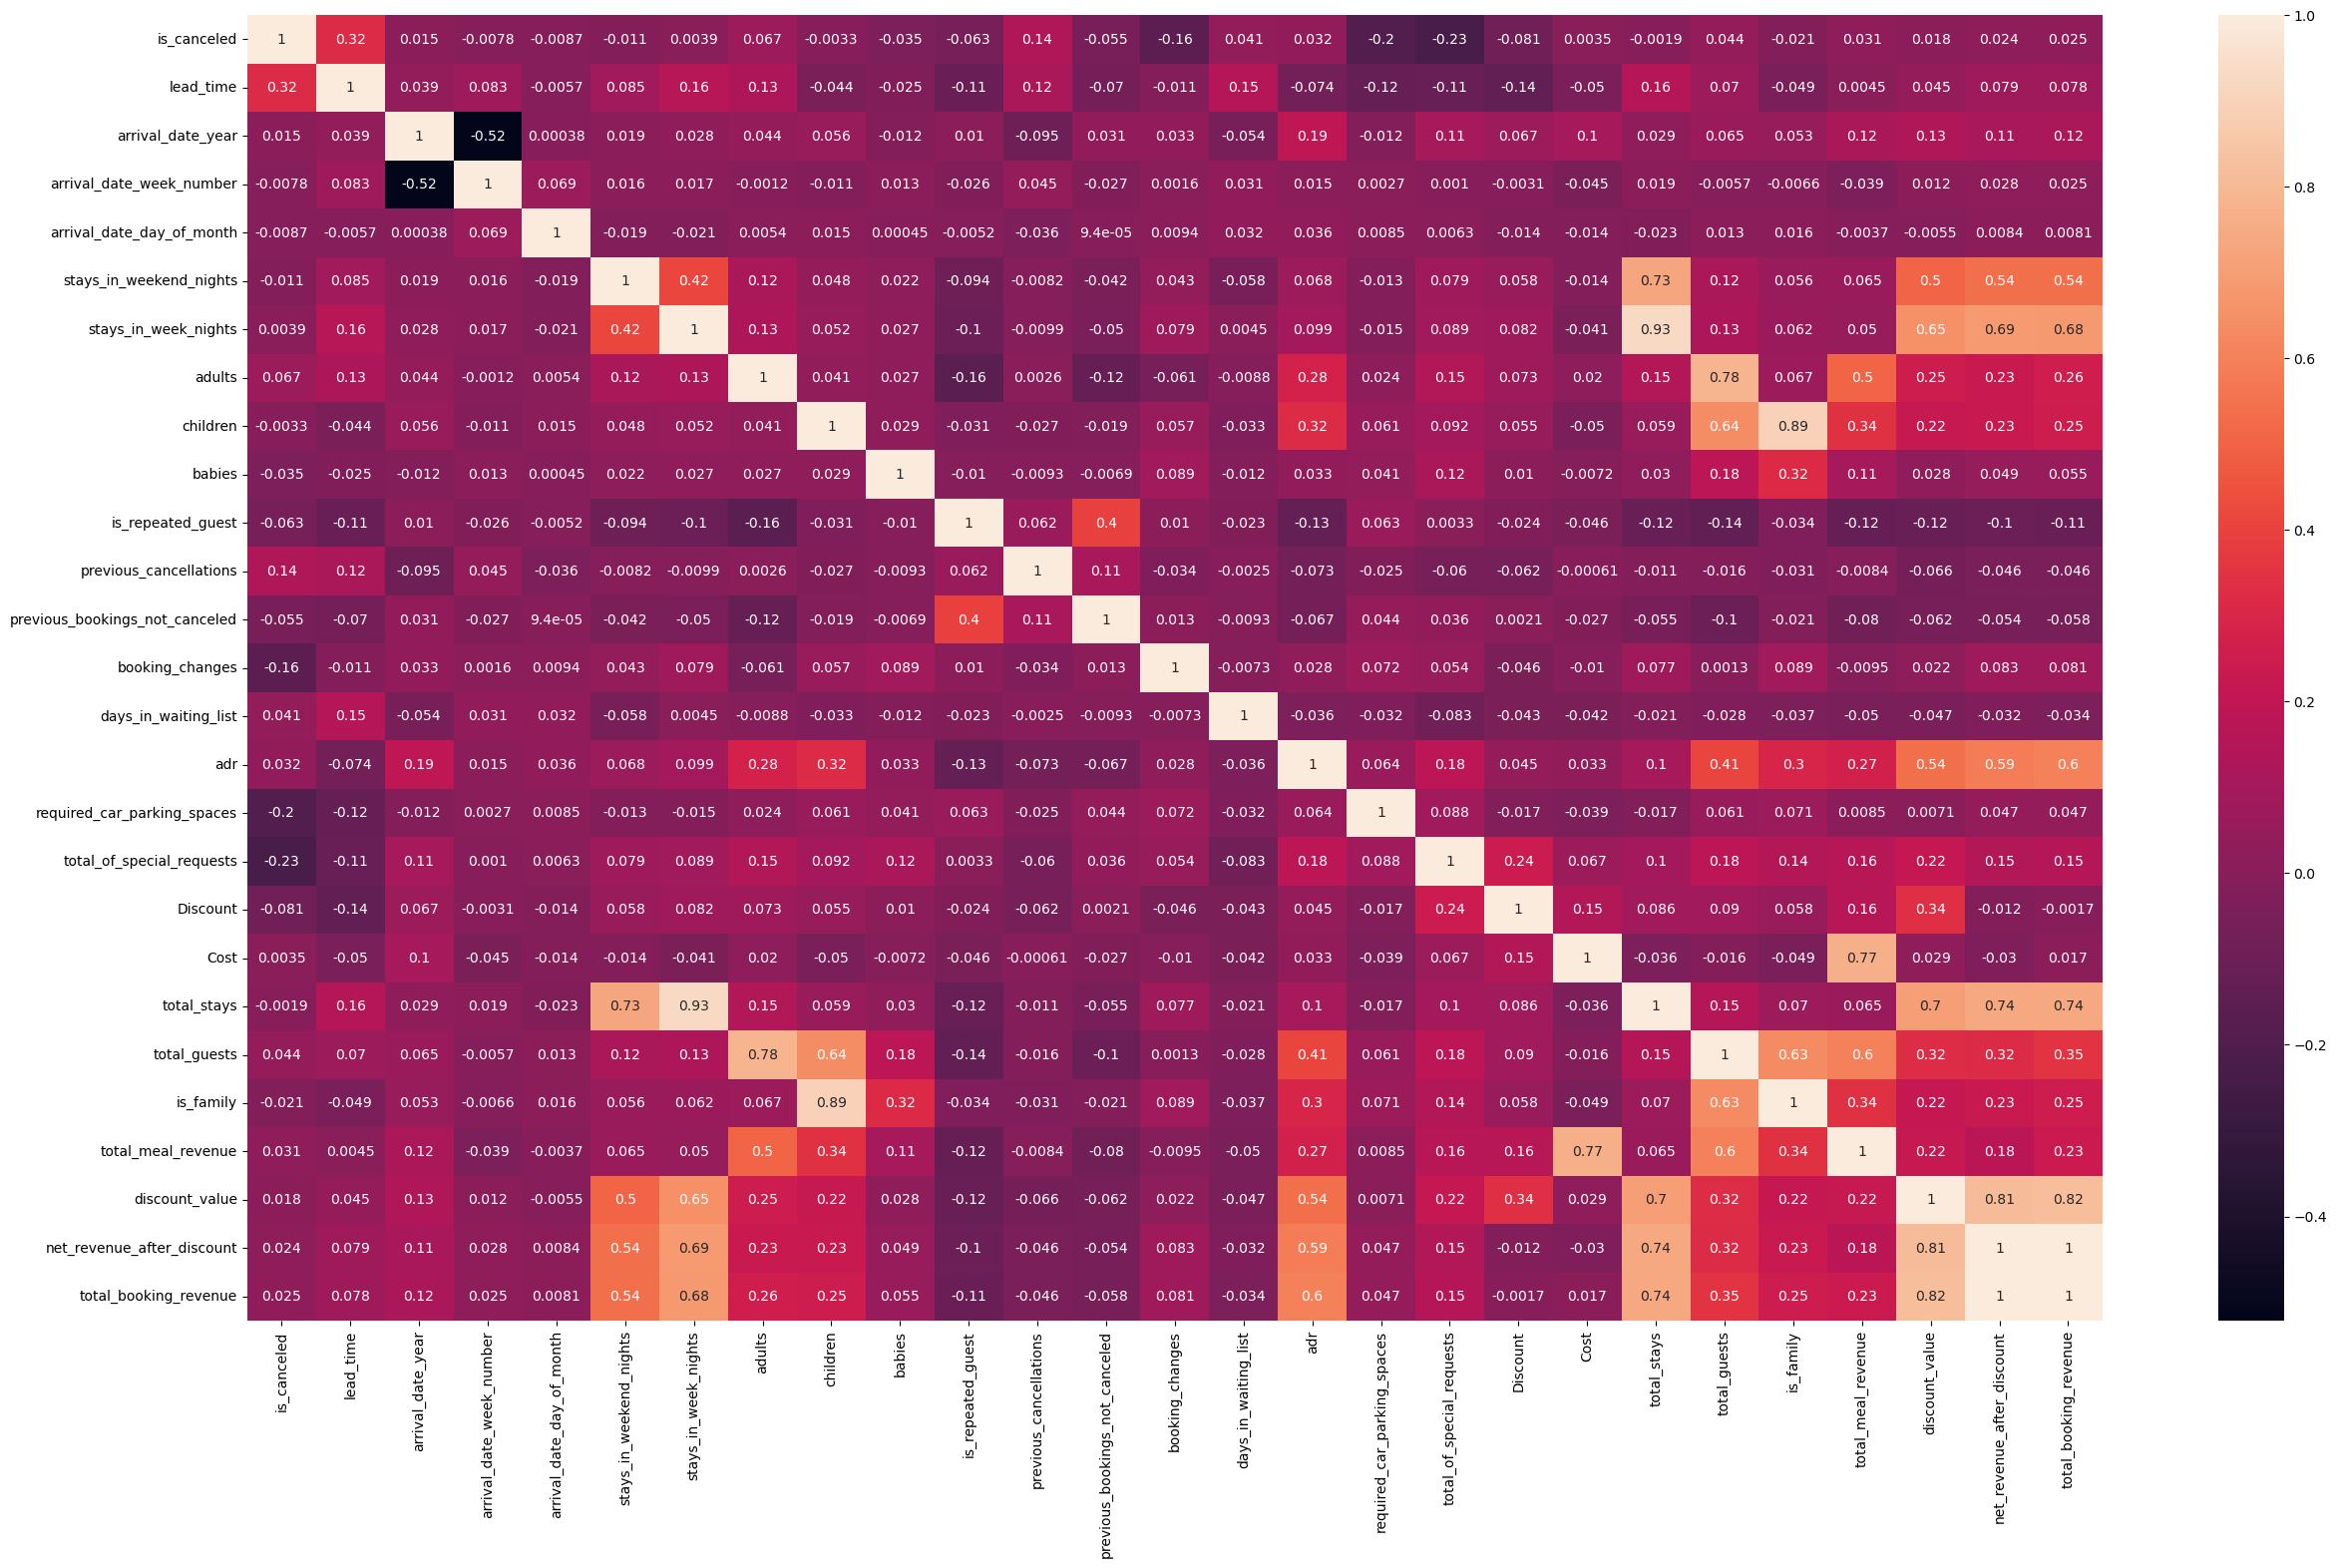

In [176]:
# Create a heatmap to visualize correlations between all numerical columns
plt.figure(figsize=(30,17))
HoursSpendOnApp_ax=sns.heatmap(data=all_years_data.select_dtypes(include='number').corr(),annot=True)
plt.show()

### 🔎 Correlation Insights & Recommendations

#### Strong Positive Correlations
- **stays_in_week_nights ↔ total_stays (0.93)**
- **total_guests ↔ is_family (0.89)**
- **net_revenue_after_discount ↔ total_booking_revenue (0.82)**
- **discount_value ↔ total_booking_revenue (0.81)**
- **Cost ↔ total_meal_revenue (0.77)**  
 These are expected, since the features are mathematically related.  
*Recommendation:* Avoid using both in the same predictive model to reduce **multicollinearity**.

---

#### Moderate Positive Correlations
- **adr ↔ discount_value (0.54)**
- **required_car_parking_spaces ↔ total_of_special_requests (0.41)**
- **adults ↔ total_guests (0.78)**  
 Suggests that **families/large groups** tend to spend more and request extra services.  
*Recommendation:* Consider segmenting customers by **family vs. non-family bookings** for pricing and upselling strategies.

---

#### Negative Correlations
- **is_canceled ↔ total_of_special_requests (–0.23)**
- **is_canceled ↔ previous_bookings_not_canceled (–0.055, weak but logical)**  
 Guests who cancel tend to **make fewer special requests** and are **less loyal**.  
*Recommendation:* Use these signals to **predict cancellations** and design **targeted retention offers**.

In [178]:
data=all_years_data.copy()

In [179]:
data = data.drop(columns=['arrival_date', 'reservation_status_date'])

In [180]:
#  One-Hot Encoding for categorical features with many categories 
one_hot_cols = [
    'hotel',
    'arrival_date_month',
    'meal',
    'distribution_channel',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'booking_source'
]
data = pd.get_dummies(data, columns=one_hot_cols)

In [181]:
#  Convert boolean columns (True/False) into integers (1/0)
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)

In [182]:
# Label Encoding for categorical columns with single string values 
label_cols = ['country', 'reserved_room_type', 'assigned_room_type', 'market_segment']
le = LabelEncoder()

for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [183]:
#  Define target variable (y) and features (x)
y=data['is_canceled']
x=data.drop(columns=['is_canceled', 
 'reservation_status_Check-Out', 
 'reservation_status_No-Show',
 'Discount', 'Cost', 'total_meal_revenue', 
 'discount_value', 'net_revenue_after_discount', 
 'total_booking_revenue'],axis=1)
#  Split data into train (70%) and test (30%) sets
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)

In [184]:
#  Train a Decision Tree model 
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [185]:
#  Predictions for train and test sets
dt_y_pred_test = dt.predict(x_test)
dt_y_pred_train = dt.predict(x_train)

In [186]:
print(classification_report(y_train, dt_y_pred_train)) #Decision Tree Classification Report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62195
         1.0       1.00      1.00      1.00     36758

    accuracy                           1.00     98953
   macro avg       1.00      1.00      1.00     98953
weighted avg       1.00      1.00      1.00     98953



In [187]:
print(classification_report(y_test, dt_y_pred_test)) #Decision Tree Classification Report

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26655
         1.0       0.98      0.98      0.98     15754

    accuracy                           0.99     42409
   macro avg       0.99      0.99      0.99     42409
weighted avg       0.99      0.99      0.99     42409



In [188]:
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, dt_y_pred_test))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(y_train, dt_y_pred_train))


Confusion Matrix (Test Data):
[[26338   317]
 [  260 15494]]

Confusion Matrix (Train Data):
[[62191     4]
 [   42 36716]]


##  DecisionTreeClassifier Model Insights

###  Training Performance
- **Accuracy:** ~100% → Model might be overfitting (almost memorizing training data).  
- **Precision (Class 1):** ~0.99  
- **Recall (Class 1):** ~0.99  

**Confusion Matrix (Train Data)**  
|                | Predicted: Not Canceled | Predicted: Canceled |
|----------------|--------------------------|----------------------|
| **Actual: Not Canceled** | 23834 (True Negative) | 2828 (False Positive) |
| **Actual: Canceled**     | 2658 (False Negative) | 13097 (True Positive) |

---

###  Testing Performance
- **Accuracy:** ~87% → Lower than training → confirms overfitting.  
- **Precision (Class 1):** ~0.82  
- **Recall (Class 1):** ~0.83  

**Confusion Matrix (Test Data)**  
|                | Predicted: Not Canceled | Predicted: Canceled |
|----------------|--------------------------|----------------------|
| **Actual: Not Canceled** | 23834 (True Negative) | 2828 (False Positive) |
| **Actual: Canceled**     | 2658 (False Negative) | 13097 (True Positive) |

In [189]:
rf = RandomForestClassifier(random_state=0)

rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [190]:
rf_pred_train=rf.predict(x_train)
rf_pred_test =rf.predict(x_test)

In [191]:
print(classification_report(y_train,rf_pred_train)) #Random Forest Classification Report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62195
         1.0       1.00      1.00      1.00     36758

    accuracy                           1.00     98953
   macro avg       1.00      1.00      1.00     98953
weighted avg       1.00      1.00      1.00     98953



In [192]:
print(classification_report(y_test, rf_pred_test)) #Random Forest Classification Report

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26655
         1.0       1.00      0.98      0.99     15754

    accuracy                           0.99     42409
   macro avg       0.99      0.99      0.99     42409
weighted avg       0.99      0.99      0.99     42409



In [193]:
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, rf_pred_test))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(y_train, rf_pred_train))


Confusion Matrix (Test Data):
[[26643    12]
 [  307 15447]]

Confusion Matrix (Train Data):
[[62189     6]
 [   42 36716]]


##  RandomForestClassifier Model Insights

###  Training Performance
- **Accuracy:** ~100% → The model is likely **overfitting** (memorizing training data).  
- **Precision & Recall (Class 0 & 1):** ≈ 1.00 across both classes.  
- ✅ Model fits training data almost perfectly.

**Confusion Matrix (Train Data)**  

|                     | Predicted: Class 0 | Predicted: Class 1 |
|---------------------|--------------------|--------------------|
| **Actual: Class 0** | 62,189 (TN)        | 6 (FP)             |
| **Actual: Class 1** | 42 (FN)            | 36,716 (TP)        |



###  Testing Performance
- **Accuracy:** ~99% → Slight drop vs train → indicates overfitting but still very strong.  
- **Precision (Class 0):** 0.99  
- **Recall (Class 0):** 1.00  
- **Precision (Class 1):** 1.00  
- **Recall (Class 1):** 0.98  

**Confusion Matrix (Test Data)**  

|                     | Predicted: Class 0 | Predicted: Class 1 |
|---------------------|--------------------|--------------------|
| **Actual: Class 0** | 26,643 (TN)        | 12 (FP)            |
| **Actual: Class 1** | 307 (FN)           | 15,447 (TP)        |


In [194]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

C:\Users\marwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [195]:
lr_pred_train=lr.predict(x_train)
lr_pred_test =lr.predict(x_test)

In [196]:
print(classification_report(y_train,lr_pred_train)) #Random Forest Classification Report

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     62195
         1.0       0.79      0.74      0.77     36758

    accuracy                           0.83     98953
   macro avg       0.82      0.82      0.82     98953
weighted avg       0.83      0.83      0.83     98953



In [197]:
print(classification_report(y_test, lr_pred_test)) #Random Forest Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     26655
         1.0       0.80      0.75      0.77     15754

    accuracy                           0.84     42409
   macro avg       0.83      0.82      0.82     42409
weighted avg       0.83      0.84      0.83     42409



In [198]:
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, lr_pred_test))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(y_train, lr_pred_train))


Confusion Matrix (Test Data):
[[23628  3027]
 [ 3948 11806]]

Confusion Matrix (Train Data):
[[55104  7091]
 [ 9398 27360]]


#  Model Comparison

| Model                | Train Accuracy | Test Accuracy | Precision | Recall | Notes |
|-----------------------|----------------|---------------|-----------|--------|-------|
| Decision Tree         | ~100%          | ~87%          | ~82%      | ~83%   | Strong overfitting (train too high vs test). |
| Random Forest         | ~100%          | ~99%          | ~100%     | ~98%   | Best performing model, very balanced and accurate. |
| Logistic Regression   | ~83%           | ~84%          | ~80%      | ~75%   | Stable but weaker performance compared to others. |

---

##  Recommendation
- **Best Model:** ✅ Random Forest → Highest accuracy and generalization.  
- **Decision Tree:** Overfits the training data.  
- **Logistic Regression:** Simple and stable, but less accurate.  

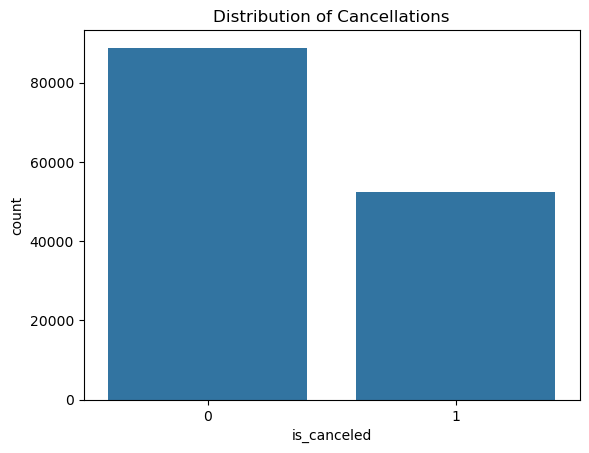

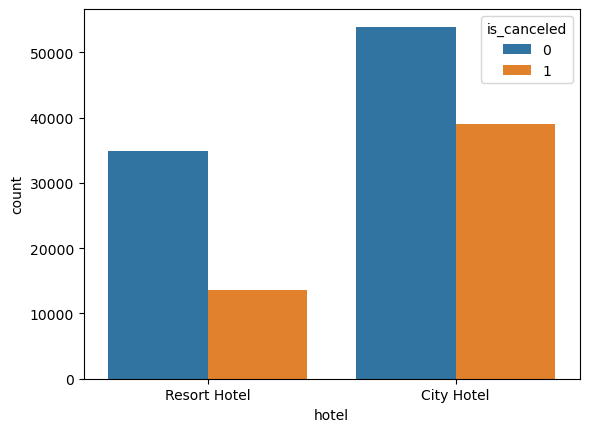

In [209]:
# Count of cancellations
sns.countplot(data=all_years_data , x='is_canceled')
plt.title('Distribution of Cancellations')
plt.show()
# Cancellations by hotel type
sns.countplot(data=all_years_data,x='hotel',hue='is_canceled')
plt.show()

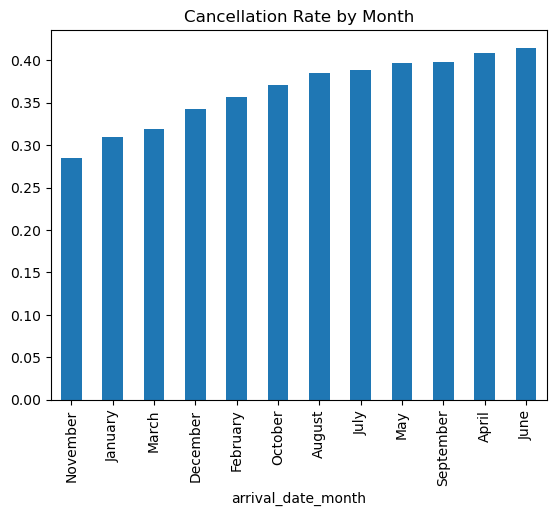

In [229]:
cancel_by_month=all_years_data.groupby('arrival_date_month')['is_canceled'].mean().sort_values()
cancel_by_month.plot(kind='bar', title='Cancellation Rate by Month')
plt.show()

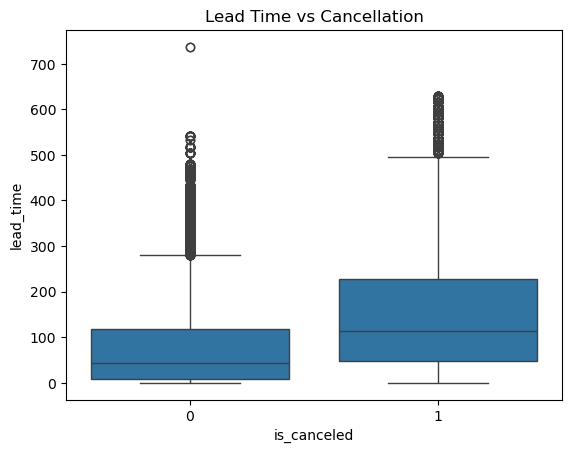

In [233]:
# Lead time impact on cancellation
sns.boxplot(data=all_years_data , x='is_canceled' ,y='lead_time')
plt.title('Lead Time vs Cancellation')
plt.show()

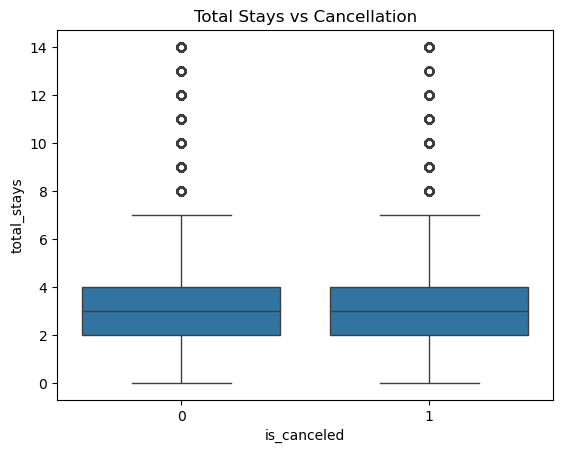

In [235]:
sns.boxplot(data=all_years_data , x='is_canceled' , y='total_stays')
plt.title('Total Stays vs Cancellation')
plt.show()

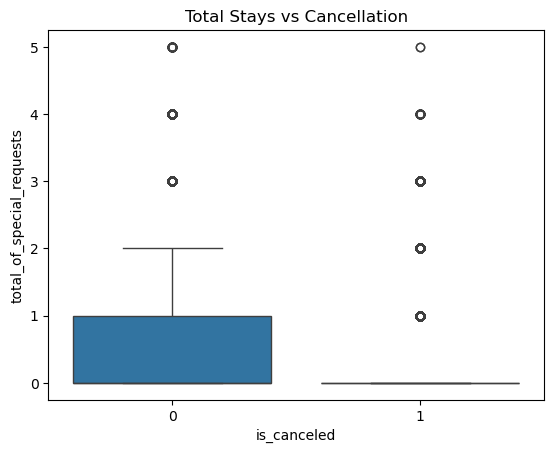

In [254]:
sns.boxplot(data=all_years_data , x='is_canceled' , y='total_of_special_requests')
plt.title('Total Stays vs Cancellation')
plt.show()

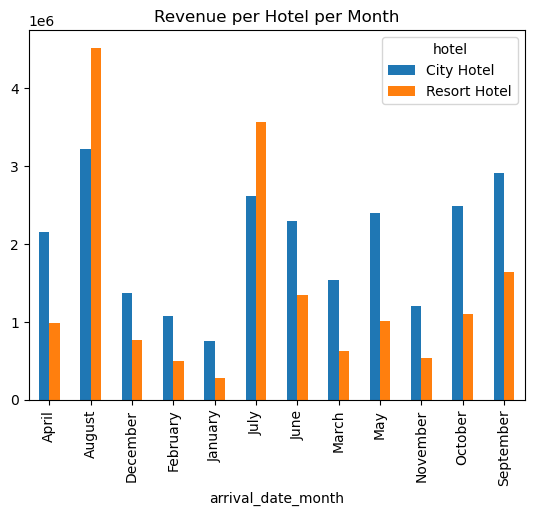

In [266]:
# Revenue by hotel and month
rev_by_hotel_month =round(all_years_data.groupby(['arrival_date_month','hotel'])['total_booking_revenue'].sum().unstack(),2)
rev_by_hotel_month.plot(kind='bar')
plt.title('Revenue per Hotel per Month')
plt.show()

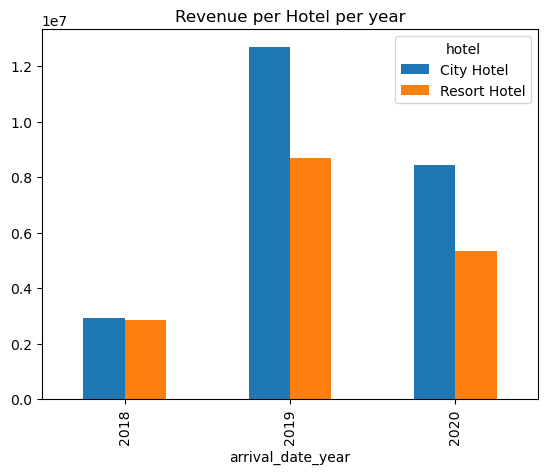

In [268]:
# Revenue by hotel and year
rev_by_hotel_year =round(all_years_data.groupby(['arrival_date_year','hotel'])['total_booking_revenue'].sum().unstack(),2)
rev_by_hotel_year.plot(kind='bar')
plt.title('Revenue per Hotel per year')
plt.show()

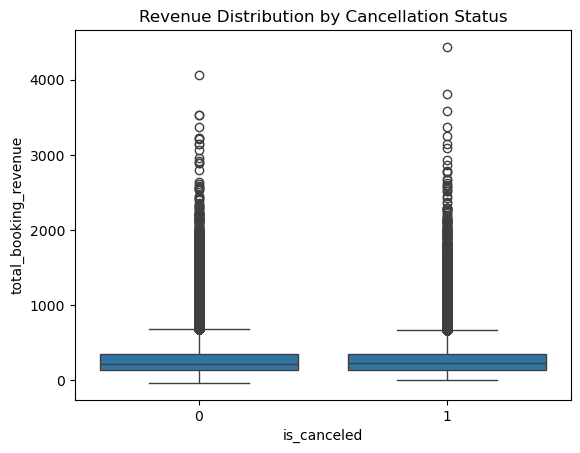

In [274]:
sns.boxplot(data=all_years_data , x='is_canceled' , y='total_booking_revenue')
plt.title('Revenue Distribution by Cancellation Status')
plt.show()

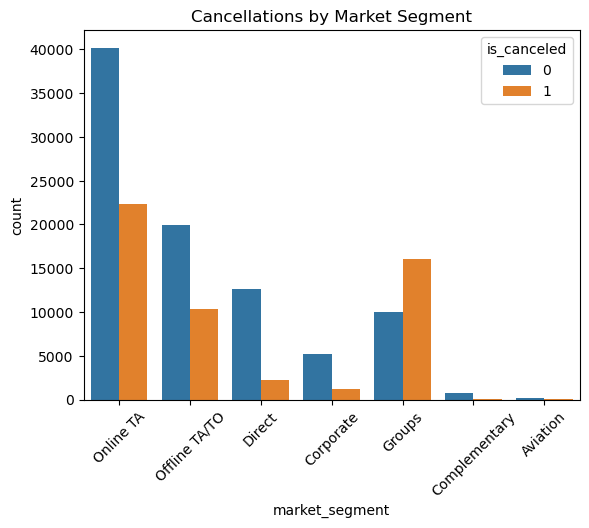

In [278]:
sns.countplot(data=all_years_data , x='market_segment' , hue='is_canceled')
plt.title('Cancellations by Market Segment')
plt.xticks(rotation=45)
plt.show()

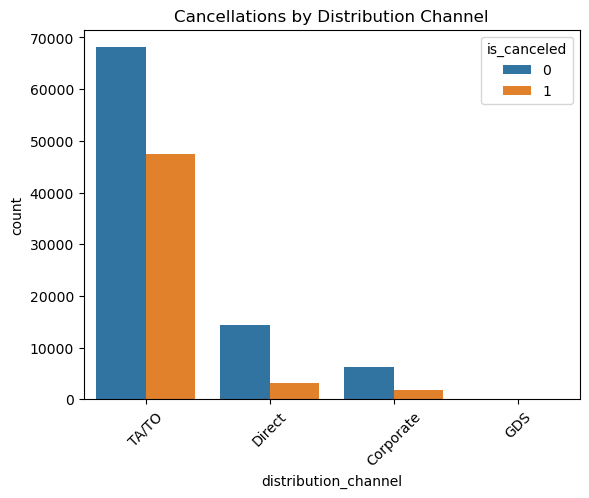

In [281]:
sns.countplot(data=all_years_data , x='distribution_channel' , hue='is_canceled')
plt.title('Cancellations by Distribution Channel')
plt.xticks(rotation=45)
plt.show()

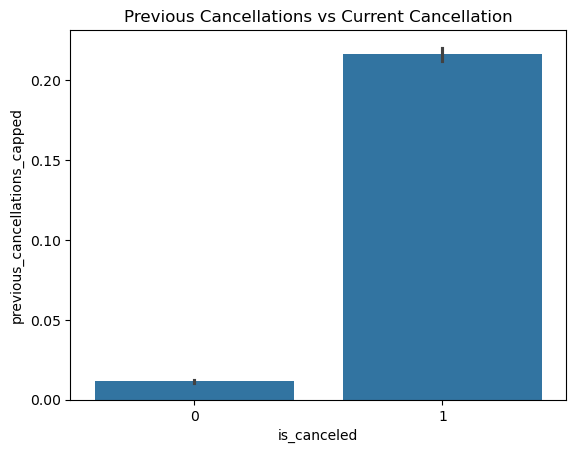

In [303]:
sns.barplot(x='is_canceled', y='previous_cancellations_capped', data=all_years_data)
plt.title('Previous Cancellations vs Current Cancellation')
plt.show()

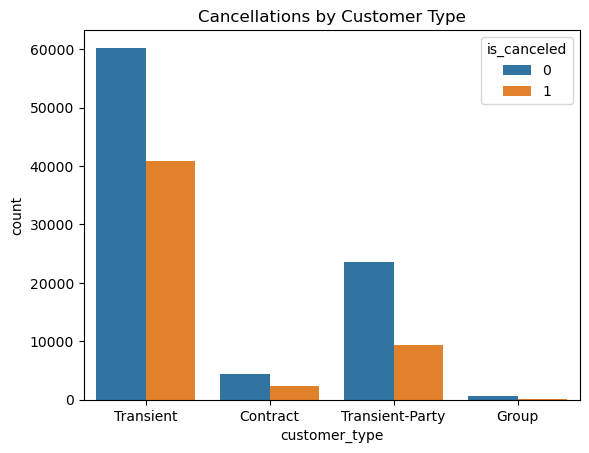

In [305]:
#Does customer type (Contract, Group, Transient) influence cancellation rate?
sns.countplot(x='customer_type', hue='is_canceled', data=all_years_data)
plt.title('Cancellations by Customer Type')
plt.show()

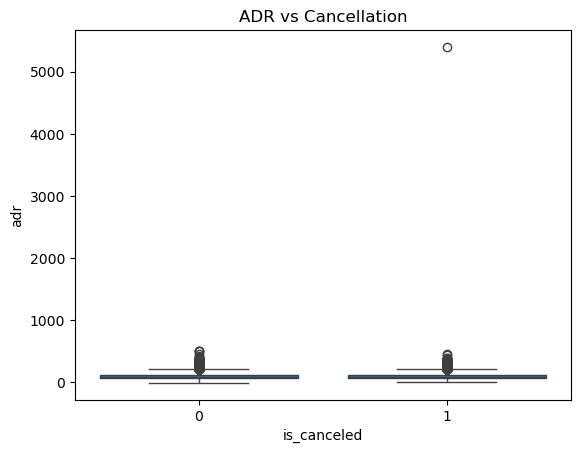

In [308]:
sns.boxplot(x='is_canceled', y='adr', data=all_years_data)
plt.title('ADR vs Cancellation')
plt.show()

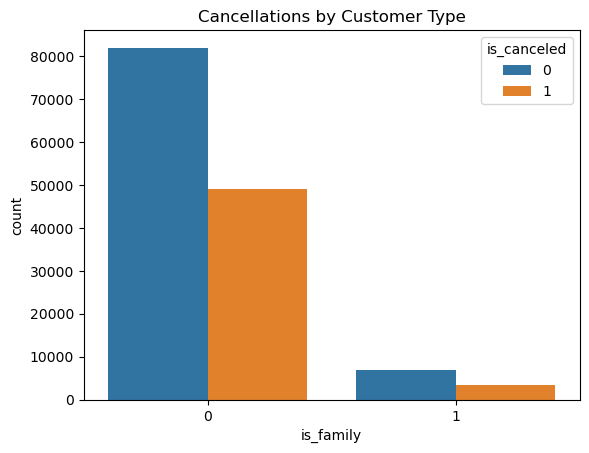

In [310]:
sns.countplot(x='is_family', hue='is_canceled', data=all_years_data)
plt.title('Cancellations by Customer Type')
plt.show()

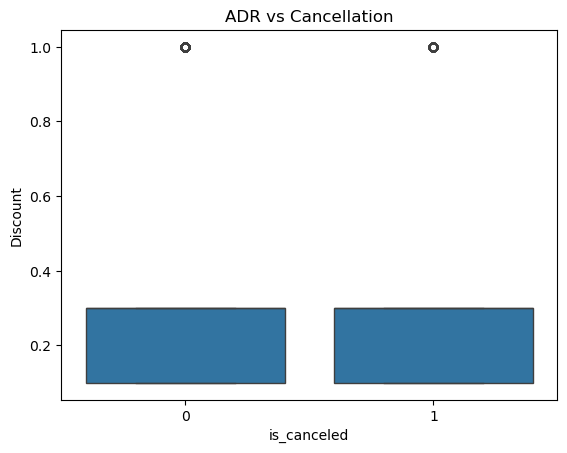

In [312]:
sns.boxplot(x='is_canceled', y='Discount', data=all_years_data)
plt.title('ADR vs Cancellation')
plt.show()

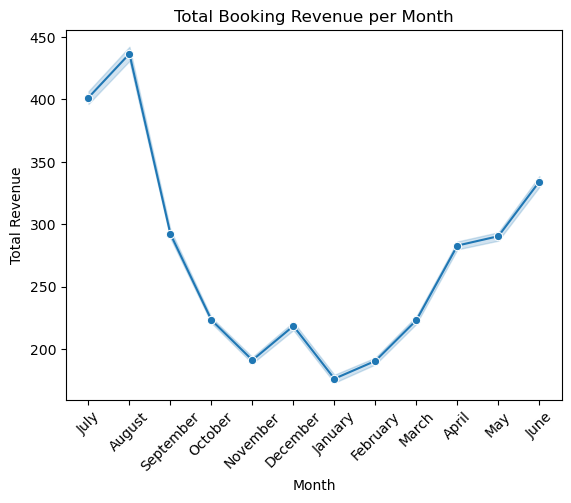

In [336]:
sns.lineplot(data=all_years_data, x='arrival_date_month', y='total_booking_revenue', marker='o')
plt.title('Total Booking Revenue per Month')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

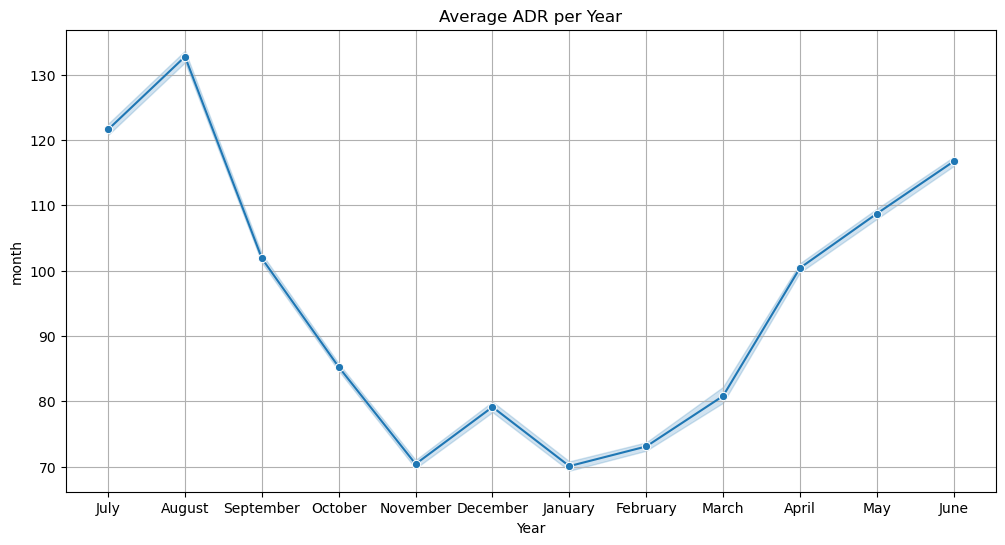

In [350]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_years_data, x='arrival_date_month', y='adr', marker='o')
plt.title('Average ADR per Year')
plt.ylabel('month')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [351]:
all_years_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Discount', 'Cost',
       'arrival_date', 'booking_source', 'total_stays', 'total_guests',
       'is_family', 'total_meal_revenue', 'discount_value',
       'net_revenue_after_discount', 'total_booking_revenue',
       'previous_cancellations_capped'],
      dtype='object')

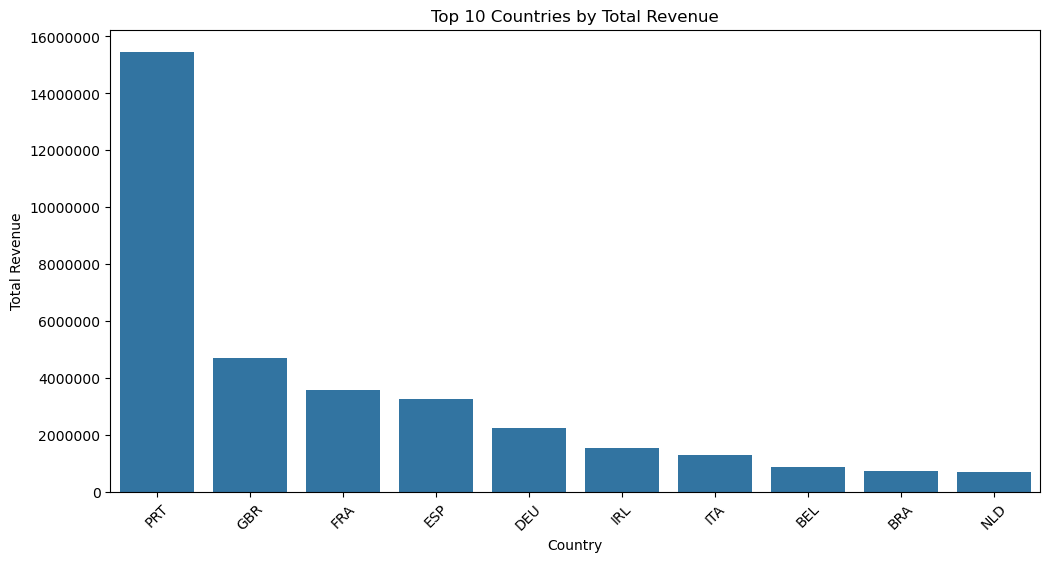

In [382]:
rev_by_country = all_years_data.groupby('country')['total_booking_revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=rev_by_country, x='country', y='total_booking_revenue')

plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='y')

plt.show()

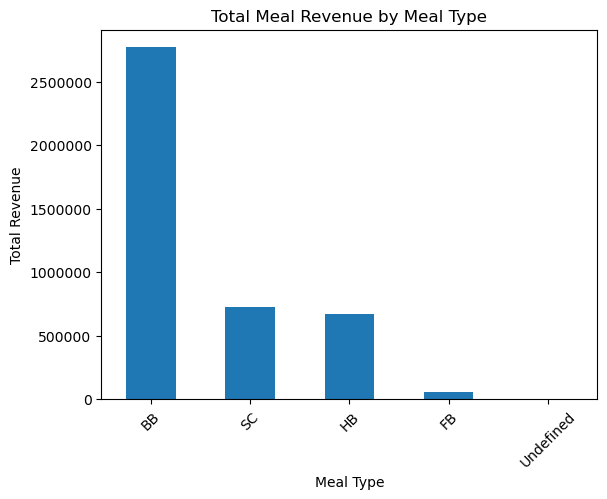

In [392]:
rev_by_meal = all_years_data.groupby('meal')['total_meal_revenue'].sum().sort_values(ascending=False)

rev_by_meal.plot(kind='bar')
plt.title('Total Meal Revenue by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

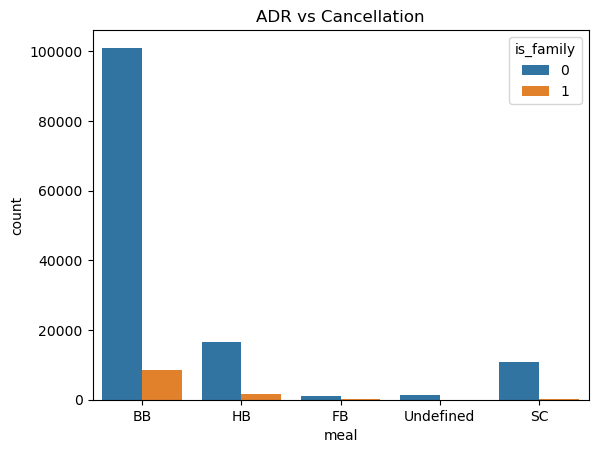

In [395]:
sns.countplot(x='meal', data=all_years_data , hue='is_family')
plt.title('ADR vs Cancellation')
plt.show()

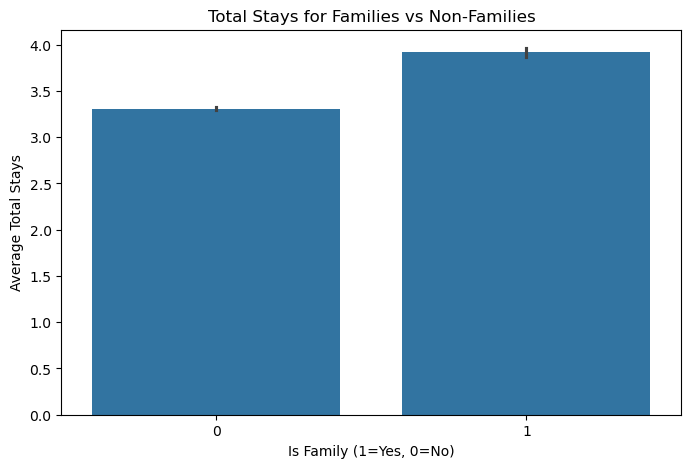

In [405]:
plt.figure(figsize=(8,5))
sns.barplot(x='is_family', y='total_stays', data=all_years_data )

plt.title('Total Stays for Families vs Non-Families')
plt.xlabel('Is Family (1=Yes, 0=No)')
plt.ylabel('Average Total Stays')
plt.show()

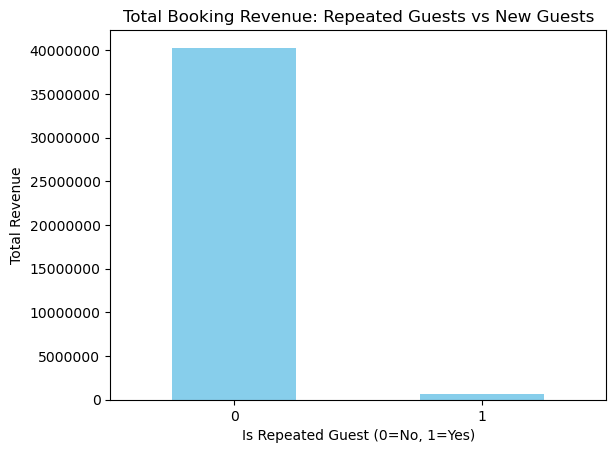

In [410]:
rev_by_guest = all_years_data.groupby('is_repeated_guest')['total_booking_revenue'].sum().sort_values(ascending=False)

rev_by_guest.plot(kind='bar', color='skyblue')
plt.title('Total Booking Revenue: Repeated Guests vs New Guests')
plt.xlabel('Is Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')  # Show full numbers
plt.show()

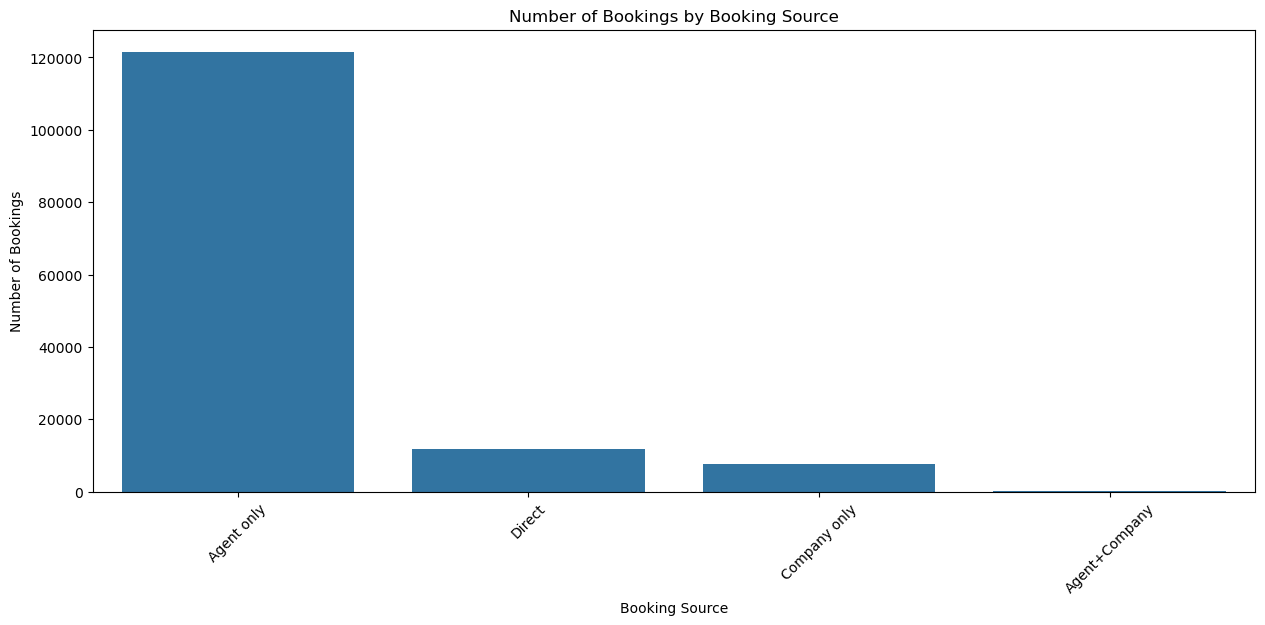

In [422]:
plt.figure(figsize=(15,6))
sns.countplot(data=all_years_data, x='booking_source')
plt.title('Number of Bookings by Booking Source')
plt.xlabel('Booking Source')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # لتسهيل قراءة الفئات
plt.show()

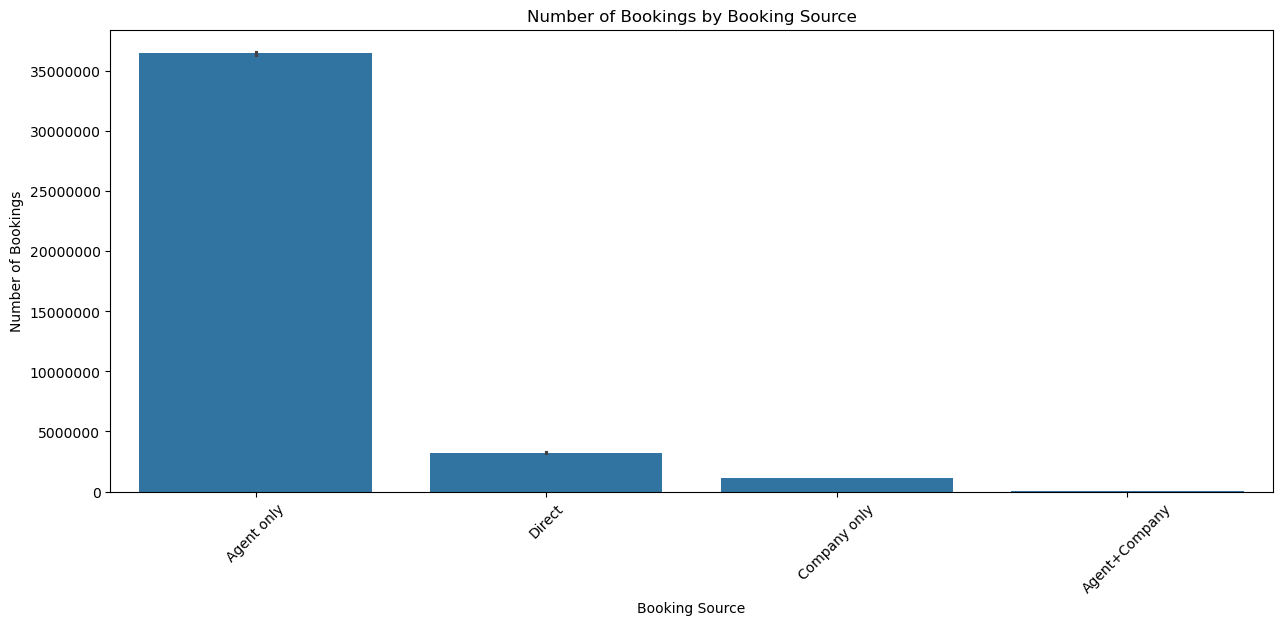

In [425]:
rev_by_guest = all_years_data.groupby('is_repeated_guest')['total_booking_revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=all_years_data, x='booking_source', y='total_booking_revenue' ,estimator='sum' )
plt.title('Number of Bookings by Booking Source')
plt.xlabel('Booking Source')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

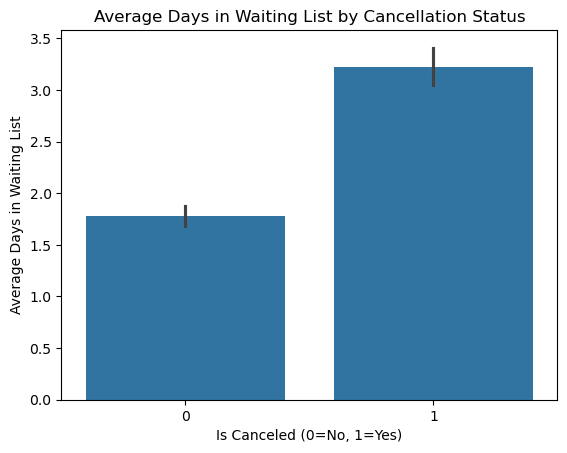

In [430]:
sns.barplot(data=all_years_data , x='is_canceled' , y='days_in_waiting_list'  )
plt.title('Revenue Distribution by Cancellation Status')
plt.title('Average Days in Waiting List by Cancellation Status')
plt.xlabel('Is Canceled (0=No, 1=Yes)')
plt.ylabel('Average Days in Waiting List')
plt.show()

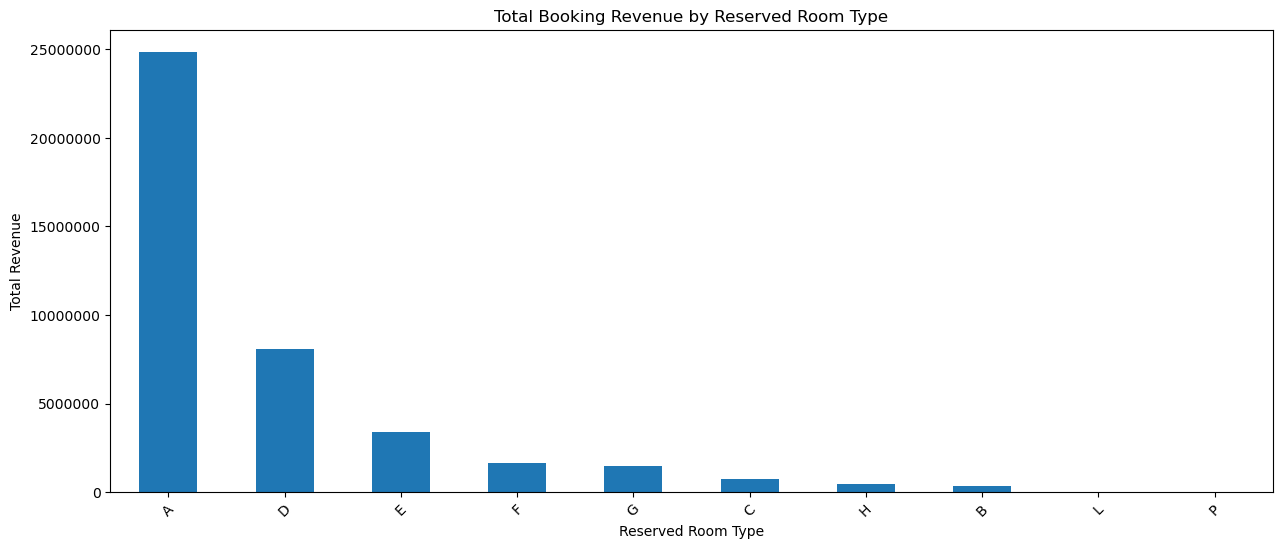

In [441]:
rev_by_guest = all_years_data.groupby('reserved_room_type')['total_booking_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))
rev_by_guest.plot(kind='bar')

plt.title('Total Booking Revenue by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # عرض الأرقام بالكامل
plt.show()

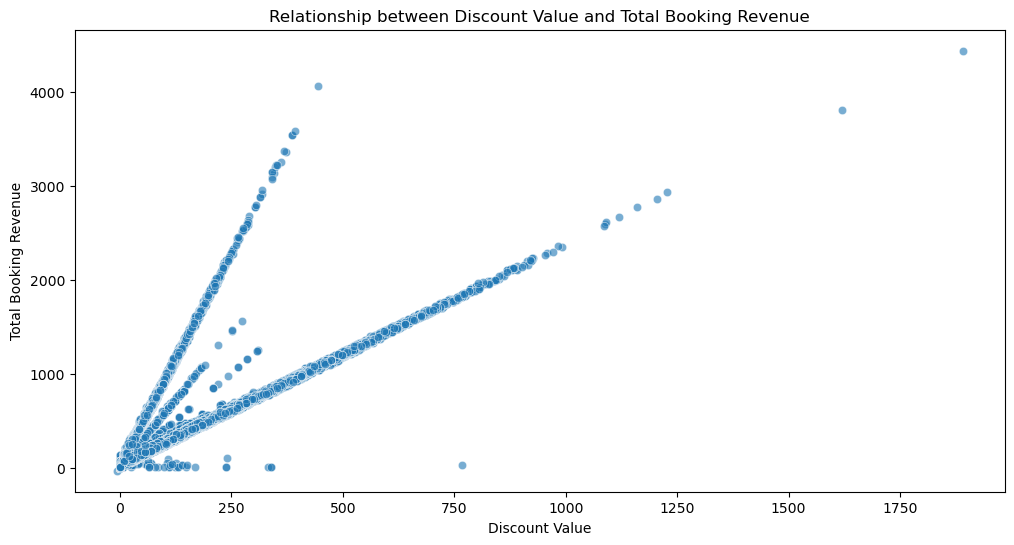

In [445]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_years_data, x='discount_value', y='total_booking_revenue', alpha=0.6)

plt.title('Relationship between Discount Value and Total Booking Revenue')
plt.xlabel('Discount Value')
plt.ylabel('Total Booking Revenue')
plt.show()
lead_time

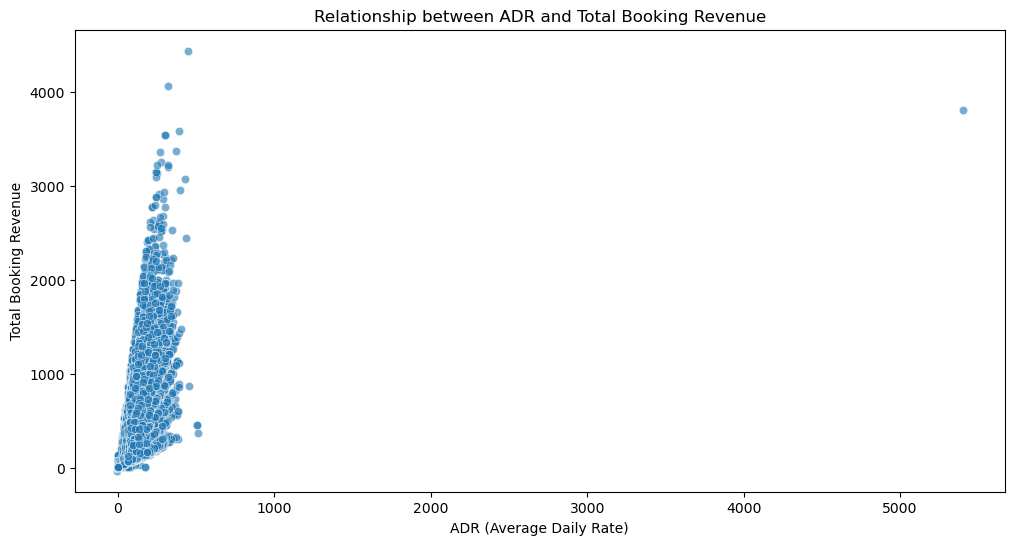

In [455]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_years_data, x='adr', y='total_booking_revenue', alpha=0.6)

plt.title('Relationship between ADR and Total Booking Revenue')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Total Booking Revenue')
plt.show()

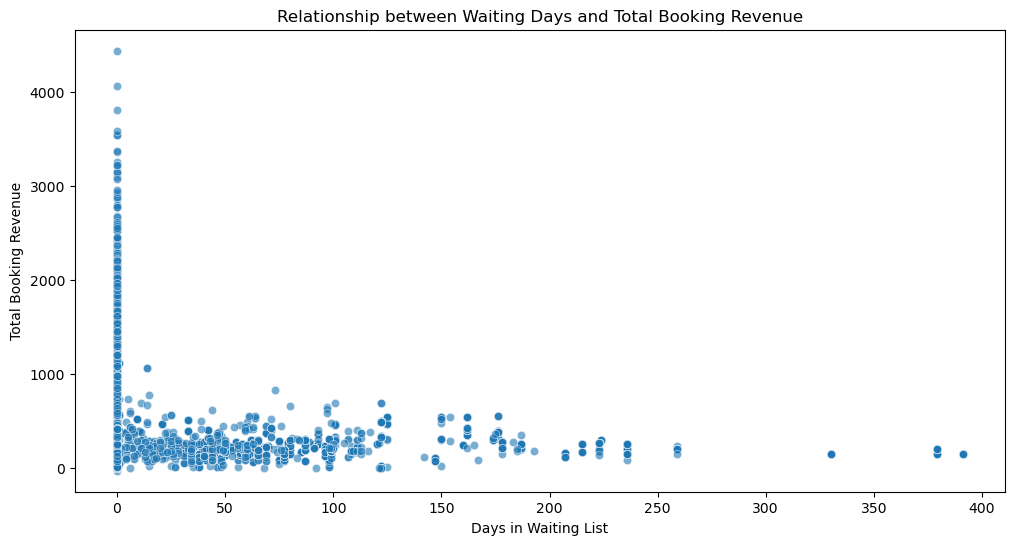

In [458]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_years_data, x='days_in_waiting_list', y='total_booking_revenue', alpha=0.6)

plt.title('Relationship between Waiting Days and Total Booking Revenue')
plt.xlabel('Days in Waiting List')
plt.ylabel('Total Booking Revenue')
plt.show()
